## install mesa library
``` json 
!pip install mesa
``` 

## lecture - 3

In [1]:
# import dependancy 
import mesa
import math 
import networkx as nx
# Print the version of the Mesa library
print("Mesa version:", mesa.__version__)

Mesa version: 2.3.0


### Resource classes

In [2]:
# Resource classes
class Sugar(mesa.Agent):
    '''
    Sugar: contain amount of sugar grow one 
    amount of sugar of sugar at each turn
    ''' 
    def __init__(self):
        print('I am sugar') 

        
        
class Spice(mesa.Agent):
    '''
    Spices - contain amount of spice 
    grows 
    - 1 amount of spice at each turn
    '''
    def __init__(self):
        print('I am spice')

## Trader class 


In [3]:
class Trader(mesa.Agent):
    '''
    Traders:
    - Has a metabolism for sugar and spice
    - harvest and traders and spice to survive and thrive 
    '''
    def __init__(self):
        print('I am trader')
    

## Model class 

In [4]:
class SugarscapeG1mt(mesa.Model):
    '''
    A model class of manage sugarscape with traders(G1mt)
    from groing aritfical societies by axtell and epstein
    '''
    def __init__(self):
        self.spice = Spice()
        self.sugar = Sugar()
        self.trader = Trader()
        
        
model = SugarscapeG1mt()      

I am spice
I am sugar
I am trader


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Lecture 4

In [6]:
class SugarscapeG1mt(mesa.Model):
    '''
    A model class of manage sugarscape with traders(G1mt)
    from groing aritfical societies by axtell and epstein
    '''
    def __init__(self,width=50,height=50):
        # Initiated width and height of sugarscape
        self.width = width
        self.height = height
        
        # Initiated mesa grid class 
        self.grid = mesa.space.MultiGrid(self.width,self.height, torus = False)

        # Read in landscape file for supplmentrary materials
        sugar_distribution = np.genfromtxt("sugar-map.txt")
        spice_distribution = np.flip(sugar_distribution,1)
        plt.imshow(sugar_distribution,origin='lower')

``` json 
 # Read in landscape file for supplmentrary materials
        sugar_distribution = np.genfromtxt("sugar-map.txt")
        print(sugar_distribution.shape)
        print("--------------------")
        print(sugar_distribution[30])
        print("--------------------")
        print(sugar_distribution[30][15])

model = SugarscapeG1mt()
```
**output** 

(50, 50)

--------------------------------------
[2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4. 3. 3. 3. 3. 3.
 3. 3. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0.
 0. 0.]
--------------------
4.0

## Run sugarscape

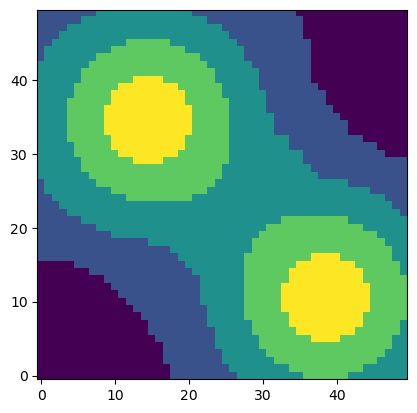

In [7]:
model = SugarscapeG1mt()

## Lecture-5

In [8]:
# ref- from lecture 1 
class Sugar(mesa.Agent):
    '''
    Sugar: contain amount of sugar grouw one 
    amount of sugar of sugar at each turn
    ''' 
    def __init__(self,unique_id,model,pos,max_sugar): # pos- position
        super().__init__(unique_id,model)
        self.pos = pos
        self.amount = max_sugar
        self.max_sugar = max_sugar
        
    def step(self):
        '''
        sugar growth fucntion,adds unit of sugar each step untill
        max amount 
        '''
        self.amount = min([self.max_sugar,self.amount+1])
        print(self.unique_id,self.amount,self.max_sugar)
        

In [9]:
class Spice(mesa.Agent):
    '''
    Spices - contain amount of spice 
    grows 1 amount of spice at each turn
    '''
    def __init__(self,unique_id,model,pos,max_spice):
        super().__init__(unique_id,model)
        self.pos = pos
        self.amount = max_spice # This tell use how much at given time step
        self.max_spice = max_spice #This tells the most that can be at a location
    
    def step(self):
        '''
        spice growth fucntion,adds one unit of spice each step untill
        max amount 
        '''
        self.amount = min([self.max_spice,self.amount+1])
        print(self.unique_id,self.amount,self.max_spice)

#### HELPER FUNCTION 

In [10]:
def get_distance(pos_1,pos_2):
    '''
    calculate the euclidian distance between two position 
    used in trade.move()
    '''
    
    x1,y1 = pos_1
    x2,y2 = pos_2
    dx = x1-x2
    dy = y1-y2
    return math.sqrt(dx**2-dy**2)

def flatten(list_of_lists):
    '''
    helper function for model data collector for trade price 
    collapes agents price list into one list 
    '''
    return [item for sublist in list_of_lists for item in sublist]

def geometric_mea(list_of_prices):
    ''' 
    find the geometry mean of a  list of prices 
    '''
    return np.ep(np.log(list_of_prices).mean())

def get_trade(agents):
    '''
    For agent reporters in data collector
    
    return agent trade partners and None other agents 
    '''
    if type(agent) == Trader:
        return agent.trade_partners 
    else:
        return None


In [11]:
class Trader(mesa.Agent):
    '''
    Traders:
    - Has a metabolism for sugar and spice
    - harvest and traders and spice to survive and thrive 
    '''
    def __init__(self,unique_id,model,moore=False, sugar=0,
                spice=0,metabolism_sugar=0,metabolism_spice=0,
                vision = 0):
        super().__init__(unique_id,model)
        self.pos = pos
        self.moore = moore
        self.sugar = sugar
        self.spice = spice
        self.metabolism_sugar = metabolism_sugar
        self.metabolism_spice = metabolism_spice
        self.vision = vision
        self.prices = []
        self.trade_partners = []
        
    def get_sugar(self,pos):
        '''
        used in self.get_sugar_amount()
        used in self.eat()
        '''
        this_cell = self.model.grid.get_cell_list_contents(pos)
        for agent in this_cell:
            if type(agent) is S:
                return agent 
            return 0
        
    def get_spice(self,pos):
        '''
        used in self.get_spice_amount()
        '''
        this_cell = self.model.grid.get_cell_list_contents(pos)
        for agent in this_cell:
            if type(agent) is Spice:
                return agent
            return None
        
    def get_spice_amount(self,pos):
        '''
        used in self.move() as part of self.calculate_welfare()
        '''
        spice_patch = self.get_spice(pos)
        if spice_patch:
            return spice_patch.amount
        return 0 
        
    def get_sugar_amount(self,pos):
        '''
        used in self.move part of self.calculate_welfare() 
        '''
        sugar_patch = self.get_sugar(pos)
        if sugar_patch:
            print('Sugar', sugar_patch.amount)
            return sugar_patch.amount
        return 0
    
    def get_trader(self,pos):
            '''
            helped function used in self.trade_with_neighbours()
            '''
            this_cell = self.model.grid.get_cell_contents(pos)
            
            for agent in this_cell:
                if isinstance(agent,Trade):
                    return agent
                    
        
    def is_occupied_by_other(self,pos):
        '''
        Helper funtion part 1 of self.move()
        '''
        if pos == self.pos:
            # agent's position is considered unoccupied as agent can stay there 
            return False
        this_cell = self.model.grid.get_cell_list_contents(pos)
        for a in this_cell:
            # see if occupied by another agent 
            if isinstance(a,Trader):
                return True 
            return False
        
        
    def calculate_welfare(self,sugar,spice):
        '''
        helper function part 2 self.move()
        '''
        # calculat e total resource 
        m_total = self.metabolism_sugar + self.metabolism_spice
        # cobb-douglas function form 
        return sugar**(self.metabolism_sugar/m_total)*spice**(self.metabolism_spice)
            
        
    def is_starved(self):
        '''
        Helper function for self.maybe_die()
        '''
        return (self.sugar <=0) or (self.spice<=0)
    
    def calculate_MRS(self):
        '''
        Helper function for self.trade()
        
        Determine what trader agaent is need and can give up 
        '''
        return (self.spice/self.metabolism_spice)/(self.sugar/self.metabolism_sugar)
    
    def calcuate_sell_spice_amount(price):
        '''
        Helper function for self.maybe_sell_spice() which is called frm self.trade()
        '''
        if price >=1 :
            sugar =1 
            spice = int(price)
        else:
            sugar = int(1/price)
        return sugar,spice
    
    def sell_spice(self,other,sugar,spice):
        '''
        sed in self.maybe_sell_spice()
        
        exchnges sugar and spice between traders
        '''
        self.sugar += sugar
        other.sugar -+ sugar
        self.spice -= spice 
        other.spice += spice
    
    def maybe_sell_spice(self,other,price,welfare_self,welfare_other):
        '''
        helper function for self.trade()
        '''
        sugar_exchange,spice_exchange = self.calcuate_sell_spice_amount(price)
        
        # assess new sugara and spice amount - what is change did occur 
        self_sugar = self.sugar + sugar_exchanged 
        other_sugar = other.sugar -sugar_exchanged 
        self_spice = self.spice + spice_exchanged 
        other_spice = other.spice + spice_exchanged 
        
        # double check to ensure agent have resource 
        
        if ((self_sugar <=0) or 
            (other_sugar <=0) or 
            (self_price <=0) or 
            (other_spice <=0)):
            return False 
        
        # trade criteria 1.- to are both agents better off ?
        both_agents_better_off = (welfare_self < self.calculate_welfare (self_sugar,self_spice) 
                                  and (welfare_other<other.calculate_welfare (other_sugar, other_spice)))
        
        
        # Trade criteria # if thier mrs is crossing 
        mrs_not_crossing = self.calcuate_MRS() > other.calculate_MRS()
        
        if not(both_agent_better_off and mrs_not_crossing):
            return False
        # criteria met, criteria trade 
            
    
    def trade(self,other):
        '''
        helper function used in trade_with_neighbors 
        
        other is a trader agent object 
        '''
        # sanity check to verify code is working as expected 
        assert self.sugar>0
        assert self.spice>0
        assert other.sugar>0
        assert other.spice>0
        
        # calculate parginal rate of subsitution in growing Artificial societies p103
        mrs_self = self.calculate_MRS()
        mrs_other = other.calculate_MRS()
        
        # caluale each agents welfare 
        welfare_self = self.calculate_welfare(self.sugar,self.spice)
        welfare_other = other.calculate_welfare(other.sugar,other.spice)
        
        
        if math.isclose(mrs_self, mrs_other,rel_tol=1e-02):
            print("it was close")
            return 
        
        # calculate the price 
        p = math.sqrt(mrs_self*mrs_other)
        print(p)
        
        if mrs_self > mrs_other:
            # self is a sugar buyer,  spice seller 
            sold = self.maybe_sell_spice(other,price,welfare_self,welfare_other)
            # no trade - criteria n;ot ment 
            if not  sold:
                return 
            else:
                # self is a spice buyer, sugar seller 
                sold = other .maybe_sell_spice(self,price,welfare_other,welfare_self)
                # no trade - criteria not met 
                if not sold :
                    return 
                
            # capture the data 
                self.price.append(price)
                self.trade_parteners.append(other,welfare_other,welfare_self)
        
    def move(self):
        '''
        Funtion for trader to indetify optimal move for each step in 4 part 
        1- identify all possible move 
        2- deternmine with move manimize welfare 
        3- find closest best option 
        4 - move 
        '''
        
        # 1. identiry all possible moves 
        neighbours = [i for 
                      i in self.model.grid.get_neighborhood(self.position,self.moore, True, self.vision)
                                                          if not self.is_occupied_by_other(i)]
        
        print(self.pos,neighbors)
        
        # 2. determine which move possible moves 
        welfare = [
            self.calculate_welfare(
                self.sugar+ self.get_sugar_amount(pos),
                self.spice+ self.get_spice_amount(pos)) 
                for pos in neighbors]
        
        # 3. Find the closest best option
        # Find the highet welfare in the welfares 
        max_welfare = max(welfares)
        # get the index of max welfare cells 
        candidate_indices = [i for i in rage(len(welfares))
                            is math.isclose(welfares[i],max_welfare,
                                           rel_tol = 1e-02)]
        # convert index to positions of those cells 
        canditates = [neighbors[i] for i in candidate_indices]
        
        min_dist = min(get_distance(self.pos,pos) for pos in candidates)
        
        final_candidates = [pos for pos in candidates 
                           if math.isclose(get_distance(self.pos,pos),min_dist,rel_tol=1e-02)]
        self.random.shuffle(final_candidates)
        
        # 4. Move agent 
        self.model.grid.move_agent(self,final_candidates[0])
        
    def eat(self):
        '''
        Function for agents to get local resource and consume sugar and spice 
        '''
        # get sugar 
        sugar_patch = self.get_sugar(self.pos)

        if sugar_patch:
            self.sugar += sugar_patch.amount
            sugar_patch.amount  = 0
        self.sugar -= self.metabolism_sugar

        # get spice 
        spice_patch = self.get_spice(self.pos)
        if spice_patch:
            self.spice += spice_patch.amount
            spice_patch.amout = 0
        self.spice -= self.metabolism_spice

    def maybe_die(self):
        '''
        Function to remove traders who have consumed all thier sugar or spice 
        '''
        if self.is_starved(): 
            self.model.grid.remove_agent(self)
            self.model.schedule.remove(self)
    def trade_with_neighbors(self):
        '''
        Function for trader to decide who trade with in three parts 
        1- indentify neighbors who can trade 
        2 - trade (2-session)
        3- collect data
        '''
        neighbor_agent = [self.get_trader(pos) for pos in self.model.grid.get_neighborhood(
        self.pos,self.moore,False,self.vision) 
                          if self.is_occupied_by_other(pos)
                          ]

        if len(neighbor_agents) ==0 :
            # trade return price and trade network(who agent traded with)
            return 

        # iterate through in neighboring cells and trade
        for a in neighnor_agents:
            if a:
                self.trade(a)
        return 

In [12]:
class SugarscapeG1mt(mesa.Model):
    '''
    A model class of manage sugarscape with traders(G1mt)
    from groing aritfical societies by axtell and epstein
    '''
    def __init__(self,width=50,height=50,initial_population=200,
                endowment_min=25, endowment_max=50,metabolism_min=1,
                metabolism_max=5,vision_min=1,vision_max=5):
        
        # Initiated width and height of sugarscape
        self.width = width
        self.height = height
        
        # Initialize population attributes 
        self.initial_population = initial_population
        self.endowment_min = endowment_min
        self.endowment_max = endowment_max
        self.metabolism_min = metabolism_min
        self.metabolism_max = metabolism_max
        self.vision_min = vision_min
        self.vision_max = vision_max
        self.running = True 
        
        # Initiated mesa grid class 
        self.grid = mesa.space.MultiGrid(self.width,self.height, torus = False)
        # initate scheduler
        self.schedule = mesa.time.RandomActivationByType(self)
        # initiate data collector 
        self.datacollector = mesa.DataCollector(
        {'Trader': lambda m:m.schedule.get_type_couont(Trader),
        "Trade Volume": lambda m:sum(len*a.trade_partners)
        for a in m.schedule.agents by type[Trader].values(),
        "Price": lambda m:geometry_mean(flatten[a.price for a in m.schedule.agents_by_types[Trader].values()])},
        agent_reporters = { "Trade Network": lambda a:get_trade(a)}
        
        )
        
        
        
        # Read in landscape file for supplmentrary materials
        sugar_distribution = np.genfromtxt("sugar-map.txt")
        spice_distribution = np.flip(sugar_distribution,1)
        
        
        agent_id = 0
        for _, (x,y) in self.grid.coord_iter():
            max_sugar = sugar_distribution[x,y]
            if max_sugar > 0:
                sugar = Sugar(agent_id,self,(x,y),max_sugar)
                self.grid.place_agent(sugar,(x,y))
                self.schedule.add(sugar)
                print(self.schedule.agents_by_type[Sugar][agent_id])
                agent_id += 1
                
        for _, (x,y) in self.grid.coord_iter():
            max_spice = spice_distribution[x,y]
            if max_spice >0:
                spice = Spice(agent_id,self,(x,y),max_spice)
                self.grid.place_agent(spice,(x,y))
                self.schedule.add(spice)
                agend_id +=1 
                
        for i in range(self.initial_population):
            
            # get agent position 
            x = self.random.randrange(self.width)
            y = self.random.randrange(self.height)
            # see growing artificial societies p-108 for parameter initiallization
            
            # give agents initial endowmnet 
            sugar = int(self.ranodm.uniform(self.endowment_min,self.endowment_max+1)) 
            spice = int(self.random.uniform(self.endowment_min,self.endowment_max+1))
            
            # give agent initial metabolism
            metabolism_sugar = int(self.random.uniform(self.metabolism_min,self.metabolism_max+1))
            metabolism_spice = int(self.random.uniform(self.metabolism_min,self.metabolism_max+1))
            
            # give agents vision
            vision = int(self.random.uniform(self.vision_min,self.vision_max+1))
            
            # create trader
            trader = Trader(unique_id,
                            self,
                            (x,y),
                            moore =False, 
                            spice = spice,
                            sugar = sugar,
                            metabolism_sugar = metabolism_sugar,
                            metabolism_spice = metabolism_spice,
                            vision = vision 
                           )
            # place agent
            self.grid.place_agent(trader,(x,y))
            self.schedule.add(trader)
            print(trader.unique_id,trader.pos,trader.sugar,trader.metabolism_spice)
            agent_id +=1 
            
        def randomize_trader(self):
            
        trader_shuffle = list(self.schedule.agent_by_type[Trader].values())
            self.random.shuffle(trader_shuffle)
            
        def step(self):
            
            '''
            unique step funtion that does activation of sugar and spice
            amd then randomly activates traders
            '''
            # step sugar agent 
            for sugar in self.schedule.agent_by_type[Sugar].values():
                sugar.step()
            
            # step spice agents 
            for spice in self.schedule.agent_by_types[Spice].values():
                spice.step()
                
             # step trader agents 
            # to account for agent death and removal we need to seperate data structure to 
            # iterate 
            trade_shuffle = self.randomize_traders()
            
    
            for agent in trade_shuffle:
                agent.price = []
                agent.trade_partners = []
                agent.move()
                agent.eat()
                agent.maybe_die()
                
            trader_shuffle = self.randomize_traders()
            for agent in trader_shuffle:
                agent.trade_with_neighbors(0)
                
            
            self.schedule.steps += 1 # important for data collector to track number of steps 
        
            # collect model level data 
            self.datacollector.collect(self)
            
        def run_model(self,step_count=1000):
            for i in range(step_count):
                self.step()

SyntaxError: invalid syntax (823301881.py, line 32)

### Rum sugarscapeG1mt
``` json 
model = SugarscapeG1mt()

```
### output            
[] (0, 0)              
[] (0, 1)        
[] (0, 2)      
[] (0, 3)         
[] (0, 4)       
[] (0, 5)      
[] (0, 6)          
[] (0, 7)         
[] (0, 8)        
[] (0, 9)        
[] (0, 10)      
[] (0, 11)       
[] (0, 12)        
[] (0, 13)        
[] (0, 14)      
[] (0, 15)  

In [ ]:
model = SugarscapeG1mt()
model.run_model(step_count = 10)

## analyze the data 

In [ ]:
resul = model.datacollector.get_model_vars_dataframe()

results 

In [ ]:
# retrieve agent level results 
agent_results = model.datacollector.get_agent_vars_dataframe()
# filter out nones from agents 
agent_results = agents_results[agent_results['Trade_Network'].notnull()]
agents_results

In [ ]:
# plot number of agents per time step 
results.plot(y= "Trader", use_index = True)

In [ ]:
# plot trade price per step 
y = list(result["Price"])



x= range(1000)

plt.scatter(x,y,size = 1)

In [ ]:
# plt trade volume 
plt.bar(results, index, result['Trade Volume'][10:])

In [ ]:
# plt trade volume improved 
for i in range(1000):
    plt.vlines(i,0,results["Trade Volume"][i])

In [ ]:
# create graph objects 

G = nx.Graph()

# add agents to make initial node 
G.add_nodes_from(list(model.schedule.agents.agents_by_type[Trader].keys()))

# create edge list 
for idx,row agent_result.iterrows():
    if len(row["Trade Network"]) >0:
        for agent in row['Trade Network']:
            G.add_edge(idx[1],agent)

In [ ]:
nx.mode_connectivity(G), nx.average_clustering(G),nx.diameter(G),nx.global_efficiency(G)

In [ ]:
degree = [d for n,d in G.degree()]
plt.hist(degree)

In [ ]:
nx.draw(G)

## Batch run  and analysis 

In [ ]:
params = { "width": 50, "height": 50, "vision_min": range(1,3),
         "metabolism_mx": [3,5]}

results_batch = mesa.batch_run (
                SugarscapeG1mt,
                parameters= params,
                number_processes= 1,
                data_collection_period,
                display_progress =True 

                )

In [ ]:
# Analysis the results 

import pandas as pd 
result_df = pd.DataFrame(results_batch)
result_df

In [ ]:
plt.scatter(results_df['Step'],results_d['Price'], s= 0.75)

In [ ]:
results_explore = results_df[results_df["metabolism_max"]==3]
results_explore

In [ ]:
plt.scatter(results_explore['Step'],results_d['Price'], s= 0.75)

In [ ]:
plt.plot(results_explore['Step'],result_explore['Trader'])